# Лабораторная работа 3. Классификация. Нейронные сети

## Описание работы
**Цель работы:** изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard. 

**Постановка задачи:**

1. Необходимо выбрать и подготовить датасет для классификации, затем построить классификационные модели с помощью пяти методов:

    * Наивный Байесовский классификатор (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB);

    * Деревья решений (Decision Tree);

    * Линейный дискриминантный анализ (Linear Discriminant Analysis);

    * Метод опорных векторов (Support Vector Machines);

    * Метод ближайших соседей (k-Nearest Neighbors);

2. Затем сравните качество работы классификаторов с помощью следующих метрик:

    * Accuracy (точность),

    * Precision (доля правильно классифицированных положительных примеров),

    * Recall (чувствительность, доля верно найденных положительных примеров),

    * F1-Score (среднее гармоническое precision и recall),

    * Площадь под кривой ROC (AUC-ROC).

3. Настройте гиперпараметры каждого метода и проведите исследование влияния различных параметров на качество классификации.

4. Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.

## Ход работы

**О датасете:** Этот набор данных содержит информацию о различных атрибутах набора фруктов, позволяющую получить представление об их характеристиках. Набор данных содержит такие сведения, как идентификатор фрукта, размер, вес, сладость, хрусткость, сочность, зрелость, кислотность и качество.


Набор данных был любезно предоставлен американской сельскохозяйственной компанией. Данные были масштабированы и очищены для удобства использования.

Признаки:
* A_id: Уникальный идентификатор для каждого фрукта
* Size: Размер фрукта
* Weight: Масса фрукта
* Sweetness: Степень сладости фрукта
* Crunchiness: Текстура, указывающая на хрусткость 
* Juiciness: Уровень сочности фрукта
* Ripeness: Стадия созревания плода
* Acidity: Уровень кислотности плода
* Quality: Общее качество плода

## Анализ данных

Сначала загрузим датасет и выведем первые пять строк

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('apple_quality.csv')

data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


Проведем дескриптивный анализ:

In [74]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Удалим столбец с ID, так как не является значимым признаком и выведем информацию о датасете

In [75]:
data.drop(columns=['A_id'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [76]:
data[data.isna().any(axis=1)]

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [77]:
data.dropna(inplace=True)
data.Acidity = data.Acidity.astype(float)
data.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

После удаления неинформативного столбца A_id и очистки пропусков датасет содержит 4000 корректных записей и 8 признаков, при этом все пропуски устранены, а столбец Acidity приведён к числовому типу. Данные полностью подготовлены для дальнейшего анализа.

Преобразуем категориальный признак Quality с помощью LabelEncoder в числовой формат, что позволяет использовать их в обучении моделей

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ls = le.fit_transform(data['Quality'])

data['Quality'] = ls

data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


Далее посмотрим на баланс класса

In [79]:
data['Quality'].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

Далее выведим гистограммы признаков для оценки распределения данных и выявления возможных аномалий.

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Sweetness'}>],
       [<Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>],
       [<Axes: title={'center': 'Acidity'}>,
        <Axes: title={'center': 'Quality'}>, <Axes: >]], dtype=object)

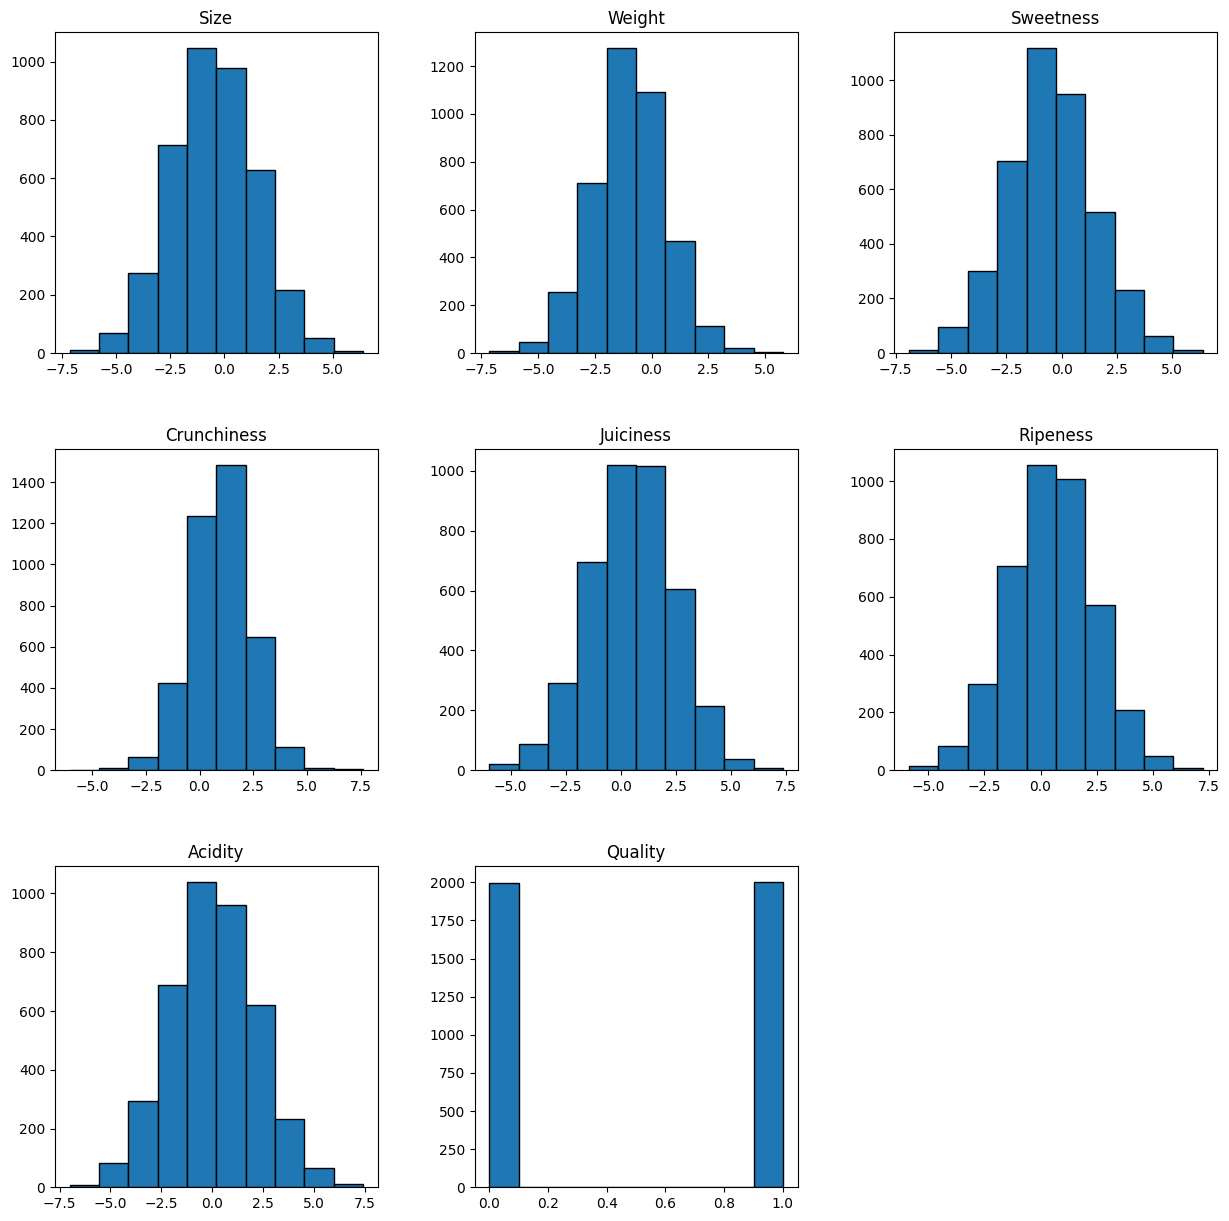

In [80]:
data.hist(edgecolor='black', figsize=(15,15), grid=False)

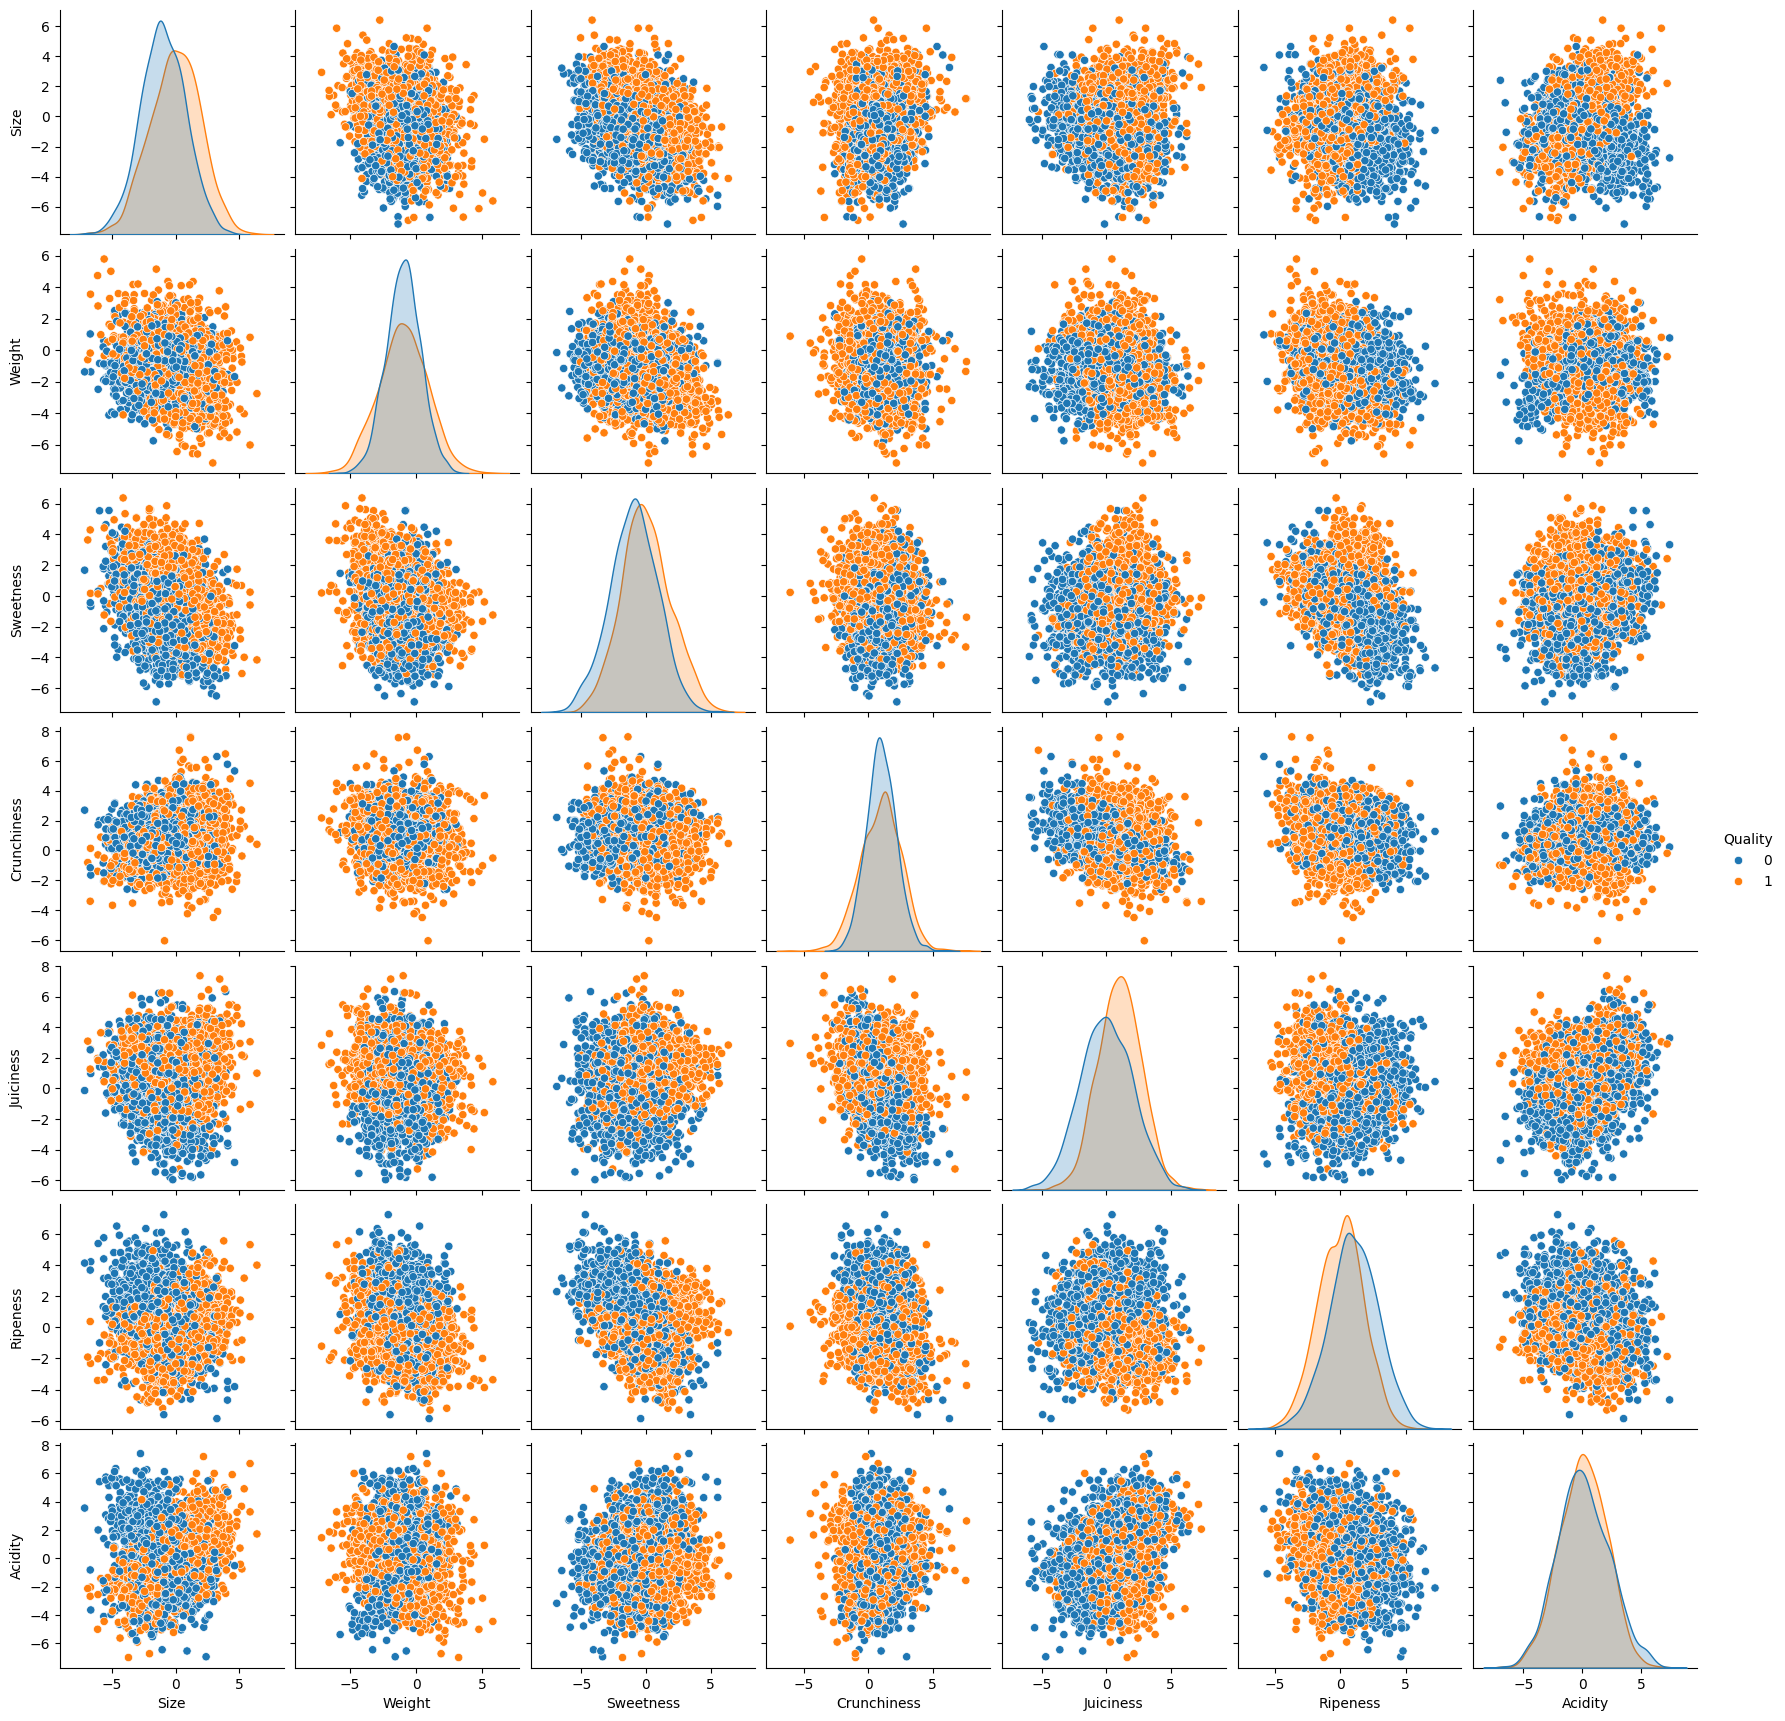

In [81]:
sns.pairplot(data, hue='Quality')

#### Стандартизация данных

In [82]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = pd.DataFrame(
    scaler.fit_transform(data),
    columns=data.columns,
    index=data.index
)
data_scaled.round(2)


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.80,-0.95,2.99,-1.42,0.69,-0.09,-0.27,1.0
1,-0.36,-1.15,2.13,0.43,0.18,0.20,-0.38,1.0
2,0.11,-0.23,-0.65,-0.95,1.21,-0.29,1.21,-1.0
3,-0.08,-0.80,0.92,-0.77,1.62,-2.09,0.34,1.0
4,0.97,-0.19,0.04,-1.10,1.31,-0.96,0.20,1.0
...,...,...,...,...,...,...,...,...
3995,0.29,-0.05,-1.67,-0.37,0.61,0.93,0.03,-1.0
3996,0.11,1.83,0.14,-1.16,-0.25,-0.85,0.84,1.0
3997,-1.11,-0.72,-1.01,-0.23,0.87,2.28,-0.67,-1.0
3998,-1.82,-0.49,1.46,-0.85,0.85,-0.15,-1.09,1.0


## Разбиение на тренеровочную и тестовую выборку

Выделем 20% на тестовую выборку и на 80% на тренировочную

In [83]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop(['Quality'], axis=1)

y = data['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Наивный Байесовский классификатор (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB)

Наивный байесовский классификатор (Naive Bayes classifier) - вероятностный классификатор на основе формулы Байеса со строгим (наивным) предположением о независимости признаков между собой при заданном классе, что сильно упрощает задачу классификации из-за оценки одномерных вероятностных плотностей вместо одной многомерной

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
model_GNB = GaussianNB()

model_GNB.fit(X_train, y_train)

y_pred_GNB = model_GNB.predict(X_test)


print(confusion_matrix(y_test, y_pred_GNB))

accuracy_GNB = accuracy_score(y_test, y_pred_GNB)
recall_GNB = recall_score(y_test, y_pred_GNB)
precision_GNB = precision_score(y_test, y_pred_GNB)
f1_GNB = f1_score(y_test, y_pred_GNB)
y_pred_proba_GNB = model_GNB.predict_proba(X_test)[:,1]
roc_auc_GNB = roc_auc_score(y_test, y_pred_proba_GNB)
print("Accuracy:", accuracy_GNB)
print("Recall:", recall_GNB)
print("Precision:", precision_GNB)
print("F1-score:", f1_GNB)
print("ROC-AUC:", roc_auc_GNB)





[[312  89]
 [101 298]]
Accuracy: 0.7625
Recall: 0.7468671679197995
Precision: 0.7700258397932817
F1-score: 0.7582697201017812
ROC-AUC: 0.8508990681191756


При применении Gaussian Naive Bayes модель показала средний уровень качества классификации. Достигнутая точность составила 0.7625, при этом Recall = 0.747 и Precision = 0.770, что говорит о сбалансированности модели между выявлением положительного класса и точностью предсказаний. Матрица ошибок показывает, что классификатор допускает заметное количество как ложноположительных, так и ложноотрицательных предсказаний (89 и 101 соответственно), что связано с чувствительностью алгоритма к распределению признаков и предположению о независимости. Значение ROC-AUC = 0.85 указывает на хорошую способность модели различать классы, несмотря на её простоту.

### Деревья решений (Decision Tree)

Дерево решений – это один из алгоритмов машинного обучения. Алгоритм основан на правиле: «Если <условие>, то <ожидаемый результат>».
Его основная идея заключается в последовательном разбиении исходного множества данных на более мелкие подмножества по признакам, которые наиболее чётко разделяют объекты разных классов. В итоге формируется древовидная структура, где каждая внутренняя вершина соответствует проверке определённого условия ветви – результатам проверки, а листья – конечным классам или числовым значениям, которые предсказывает модель. Обучение дерева решений заключается в выборе таких признаков и порогов разбиения, которые максимально уменьшают неопределённость данных.

[[344  57]
 [151 248]]
Accuracy: 0.74
Recall: 0.6215538847117794
Precision: 0.8131147540983606
F1-score: 0.7045454545454546
ROC-AUC: 0.8375052344077151


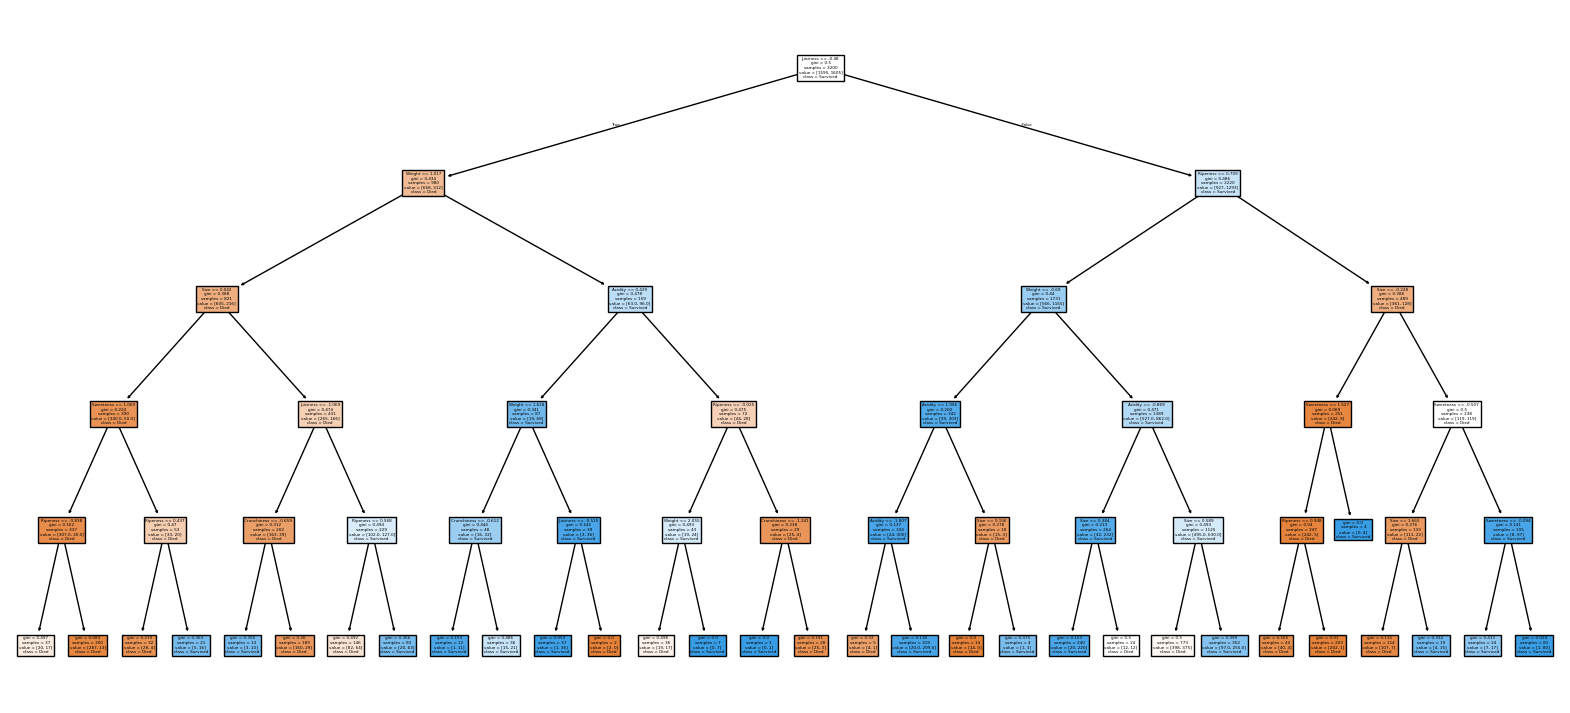

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_tree = DecisionTreeClassifier(max_depth=5)

model_tree.fit(X_train, y_train)

y_predTree = model_tree.predict(X_test)

print(confusion_matrix(y_test, y_predTree))
accuracyTree = accuracy_score(y_test, y_predTree)
recallTree = recall_score(y_test, y_predTree)
precisionTree = precision_score(y_test, y_predTree)
f1Tree = f1_score(y_test, y_predTree)
y_pred_proba_Tree = model_tree.predict_proba(X_test)[:,1]
roc_aucTree = roc_auc_score(y_test, y_pred_proba_Tree)

plt.figure(figsize=(20,9))
plot_tree(model_tree,
    filled=True,
    feature_names=X.columns,
    class_names=['Died', 'Survived']
    )
print("Accuracy:", accuracyTree)
print("Recall:", recallTree)
print("Precision:", precisionTree)
print("F1-score:", f1Tree)
print("ROC-AUC:", roc_aucTree)

Модель дерева решений с ограничением глубины до 5 уровней показала умеренное качество классификации. Точность составила 0.74, при этом наблюдается высокий уровень точности предсказаний положительного класса (Precision = 0.81), но сравнительно низкая полнота (Recall = 0.62), что означает пропуск значимой части объектов положительного класса. Матрица ошибок показывает, что дерево хорошо распознаёт отрицательный класс (344 верных предсказаний), однако допускает заметное количество ложноотрицательных ответов (151 объектов). Значение ROC-AUC = 0.84 подтверждает, что модель достаточно хорошо различает классы, но может быть улучшена за счёт более глубокой структуры или подбором гиперпараметров.

### Линейный дискриминантный анализ (Linear Discriminant Analysis)

Линейный дискриминантный анализ (Linear Discriminant Analysis или LDA) - алгоритм классификации и понижения размерности, позволяющий производить разделение классов наилучшим образом. Основная идея LDA заключается в предположении о многомерном нормальном распределении признаков внутри классов и поиске их линейного преобразования, которое максимизирует межклассовую дисперсию и минимизирует внутриклассовую. Другими словами, объекты разных классов должны иметь нормальное распределение и располагаться как можно дальше друг от друга, а одного класса - как можно ближе.

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_LDA = LinearDiscriminantAnalysis()

model_LDA.fit(X_train, y_train)

y_pred_LDA = model_LDA.predict(X_test)

print(confusion_matrix(y_test, y_pred_LDA))

accuracy_LDA = accuracy_score(y_test, y_pred_LDA)
recall_LDA = recall_score(y_test, y_pred_LDA)
precision_LDA = precision_score(y_test, y_pred_LDA)
f1_LDA = f1_score(y_test, y_pred_LDA)
y_pred_proba_LDA = model_LDA.predict_proba(X_test)[:,1]
roc_auc_LDA = roc_auc_score(y_test, y_pred_proba_LDA)

print("Accuracy:", accuracy_LDA)
print("Recall:", recall_LDA)
print("Precision:", precision_LDA)
print("F1-score:", f1_LDA)
print("ROC-AUC:", roc_auc_LDA)

[[300 101]
 [ 93 306]]
Accuracy: 0.7575
Recall: 0.7669172932330827
Precision: 0.7518427518427518
F1-score: 0.7593052109181141
ROC-AUC: 0.8226676416727604


Модель LDA продемонстрировала умеренно высокое качество классификации. Точность составила 0.76, при этом наблюдается сбалансированное соотношение между полнотой (Recall = 0.77) и точностью предсказаний положительного класса (Precision = 0.75), что свидетельствует о достаточно корректном распознавании объектов положительного класса без значительных пропусков. Матрица ошибок показывает, что модель хорошо классифицирует оба класса: отрицательный класс распознан верно 300 раз, положительный - 306 раз, при этом количество ошибок умеренное (101 и 93 соответственно). Значение ROC-AUC = 0.82 подтверждает, что модель эффективно различает классы, однако возможны улучшения за счёт дополнительной настройки гиперпараметров.

### Метод опорных векторов (Support Vector Machines)

Метод опорных векторов, или Support Vector Machine (SVM), - это один из мощных алгоритмов машинного обучения для задач классификации и регрессии. Его основная идея заключается в том, чтобы найти гиперплоскость, максимально разделяющую объекты разных классов в пространстве признаков. При этом алгоритм выбирает такую плоскость, которая обеспечивает наибольший зазор (margin) между классами, то есть расстояние до ближайших объектов обоих классов (опорных векторов) максимально.

In [87]:
from sklearn.svm import SVC

model_SVM = SVC(probability=True)

model_SVM.fit(X_train, y_train)

y_pred_SVM = model_SVM.predict(X_test)

print(confusion_matrix(y_test, y_pred_SVM))

accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
recall_SVM = recall_score(y_test, y_pred_SVM)
precision_SVM = precision_score(y_test, y_pred_SVM)
f1_SVM = f1_score(y_test, y_pred_SVM)
y_pred_proba_SVM = model_SVM.predict_proba(X_test)[:,1]
roc_auc_SVM = roc_auc_score(y_test, y_pred_proba_SVM)

print("Accuracy:", accuracy_SVM)
print("Recall:", recall_SVM)
print("Precision:", precision_SVM)
print("F1-score:", f1_SVM)
print("ROC-AUC:", roc_auc_SVM)


[[363  38]
 [ 39 360]]
Accuracy: 0.90375
Recall: 0.9022556390977443
Precision: 0.9045226130653267
F1-score: 0.903387703889586
ROC-AUC: 0.9627872674204214


Модель метода опорных векторов (SVM) продемонстрировала высокое качество классификации. Точность составила 0.90, при этом наблюдается хорошее соотношение между полнотой (Recall = 0.90) и точностью предсказаний положительного класса (Precision = 0.90), что свидетельствует о корректном распознавании объектов положительного класса с минимальными пропусками. Матрица ошибок показывает, что модель эффективно классифицирует оба класса: отрицательный класс распознан верно 363 раза, положительный - 360 раз, а количество ошибок невелико (38 и 39 соответственно). Значение ROC-AUC = 0.96 подтверждает, что модель отлично различает классы, обеспечивая высокую надёжность предсказаний.

### Метод ближайших соседей (k-Nearest Neighbors)

К-ближайших соседей (K-Nearest Neighbors или просто KNN) - алгоритм классификации и регрессии, основанный на гипотезе компактности, которая предполагает, что расположенные близко друг к другу объекты в пространстве признаков имеют схожие значения целевой переменной или принадлежат к одному классу.

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model_KN = KNeighborsClassifier()

model_KN.fit(X_train, y_train)

y_pred_KN = model_KN.predict(X_test)

print(confusion_matrix(y_test, y_pred_KN))

accuracy_KN = accuracy_score(y_test, y_pred_KN)
recall_KN = recall_score(y_test, y_pred_KN)
precision_KN = precision_score(y_test, y_pred_KN)
f1_KN = f1_score(y_test, y_pred_KN)
y_pred_proba_KN = model_KN.predict_proba(X_test)[:,1]
roc_auc_KN = roc_auc_score(y_test, y_pred_proba_KN)
print("Accuracy:", accuracy_KN)
print("Recall:", recall_KN)
print("Precision:", precision_KN)
print("F1-score:", f1_KN)
print("ROC-AUC:", roc_auc_KN)

[[360  41]
 [ 38 361]]
Accuracy: 0.90125
Recall: 0.9047619047619048
Precision: 0.8980099502487562
F1-score: 0.9013732833957553
ROC-AUC: 0.956418477615485


Модель метода ближайших соседей (KNN) продемонстрировала высокое качество классификации. Точность составила 0.90, при этом наблюдается сбалансированное соотношение между полнотой (Recall = 0.90) и точностью предсказаний положительного класса (Precision = 0.90), что свидетельствует о корректном распознавании объектов положительного класса с минимальными пропусками. Матрица ошибок показывает, что модель эффективно классифицирует оба класса: отрицательный класс распознан верно 360 раз, положительный - 361 раз, количество ошибок невелико (41 и 38 соответственно). Значение ROC-AUC = 0.96 подтверждает, что модель надёжно различает классы и обеспечивает точные предсказания.

### Сравнительный анализ методов

In [89]:
rows = [
    {'model': 'Naive Bayes', 'accuracy': accuracy_GNB, 'recall': recall_GNB, 'precision': precision_GNB, 'f1': f1_GNB, 'roc': roc_auc_GNB},
    {'model': 'Decision Tree', 'accuracy': accuracyTree, 'recall': recallTree, 'precision': precisionTree, 'f1': f1Tree, 'roc': roc_aucTree},
    {'model': 'LDA', 'accuracy': accuracy_LDA, 'recall': recall_LDA, 'precision': precision_LDA, 'f1': f1_LDA, 'roc': roc_auc_LDA},
    {'model': 'SVM', 'accuracy': accuracy_SVM, 'recall': recall_SVM, 'precision': precision_SVM, 'f1': f1_SVM, 'roc': roc_auc_SVM},
    {'model': 'KNN', 'accuracy': accuracy_KN, 'recall': recall_KN, 'precision': precision_KN, 'f1': f1_KN, 'roc': roc_auc_KN},
]
model_data = pd.DataFrame(rows, columns=['model','accuracy','recall','precision','f1','roc'])

model_data

,model,accuracy,recall,precision,f1,roc
0,Naive Bayes,0.76250,0.746867,0.770026,0.758270,0.850899
1,Decision Tree,0.74000,0.621554,0.813115,0.704545,0.837505
2,LDA,0.75750,0.766917,0.751843,0.759305,0.822668
3,SVM,0.90375,0.902256,0.904523,0.903388,0.962787
4,KNN,0.90125,0.904762,0.898010,0.901373,0.956418


Сравнительный анализ моделей показывает, что наивный Байес (Accuracy = 0.76, Recall = 0.75, Precision = 0.77, ROC-AUC = 0.85) и Линейный дискриминантный анализ (Accuracy = 0.76, Recall = 0.77, Precision = 0.75, ROC-AUC = 0.82) обеспечивают умеренно высокое и сбалансированное качество классификации, демонстрируя способность корректно различать классы при относительно небольшом количестве ошибок, что делает их подходящими для быстрых и интерпретируемых решений, но с ограниченной разделяющей способностью. Дерево решений показало более низкую точность классификации (Accuracy = 0.74) и значительный дисбаланс между полнотой и точностью (Recall = 0.62, Precision = 0.81), что указывает на пропуск значительной части объектов положительного класса при сравнительно хорошем распознавании отрицательного, и ROC-AUC = 0.84 подтверждает умеренную эффективность модели, которую можно улучшить подбором гиперпараметров или более глубокой структурой. Наиболее высокую эффективность продемонстрировали методы SVM (Accuracy = 0.90, Recall = 0.90, Precision = 0.90, ROC-AUC = 0.96) и KNN (Accuracy = 0.90, Recall = 0.90, Precision = 0.90, ROC-AUC = 0.96), обе модели обеспечивают почти идеальное соотношение полноты и точности, минимальное количество ошибок при классификации обоих классов и превосходную способность различать положительные и отрицательные объекты, что делает их оптимальными для задач с высокой критичностью точных предсказаний.

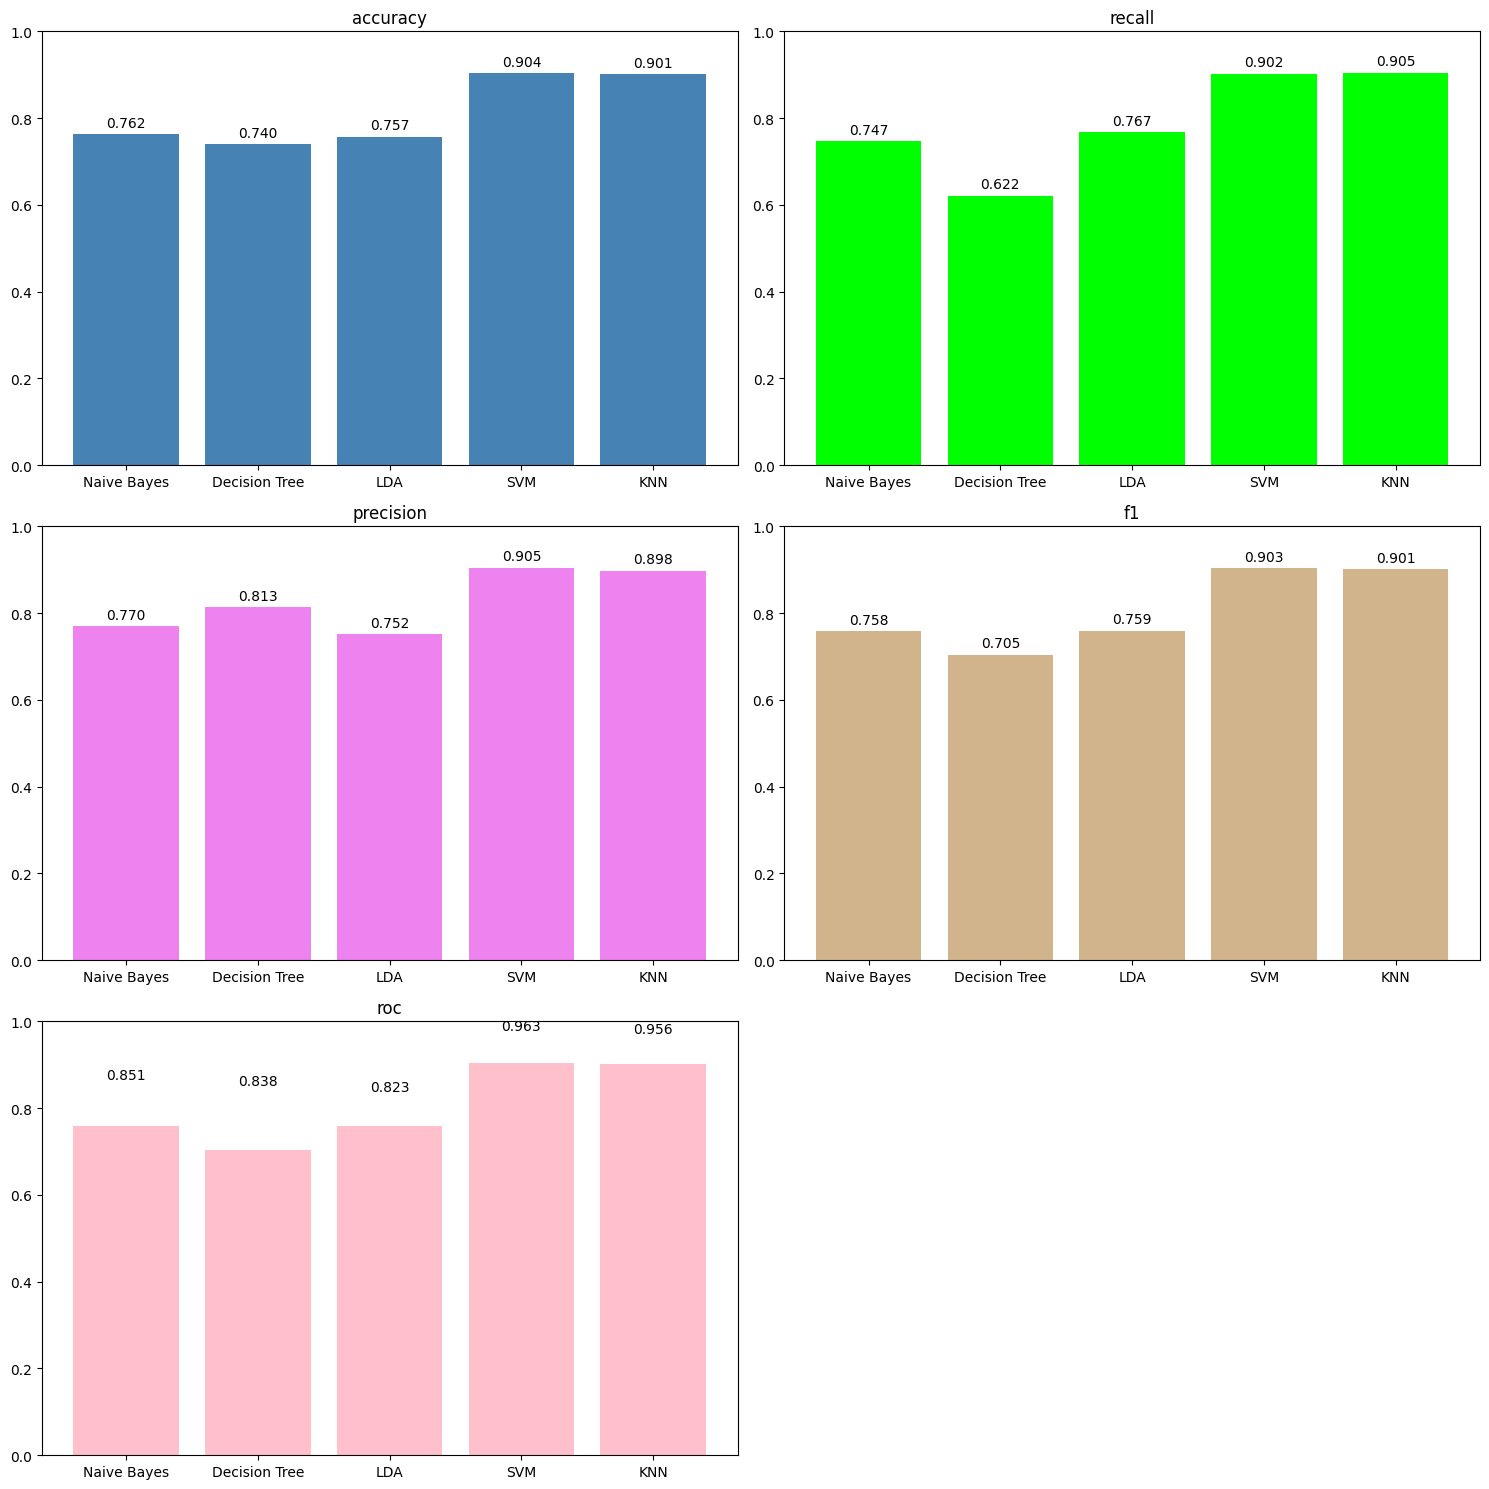

In [90]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (15,15))

ax[0,0].bar(model_data['model'], model_data['accuracy'], color='steelblue')
for i, v in enumerate(model_data['accuracy']):
    ax[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
ax[0,0].set_ylim(0,1)
ax[0,0].set_title('accuracy')

ax[0,1].bar(model_data['model'], model_data['recall'], color='lime')
ax[0,1].set_ylim(0,1)
ax[0,1].set_title('recall')
for i, v in enumerate(model_data['recall']):
    ax[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

ax[1,0].bar(model_data['model'], model_data['precision'], color='violet')
ax[1,0].set_ylim(0,1)
ax[1,0].set_title('precision')
for i, v in enumerate(model_data['precision']):
    ax[1,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

ax[1,1].bar(model_data['model'], model_data['f1'], color='tan')
ax[1,1].set_ylim(0,1)
ax[1,1].set_title('f1')
for i, v in enumerate(model_data['f1']):
    ax[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

ax[2,0].bar(model_data['model'], model_data['f1'], color='pink')
ax[2,0].set_ylim(0,1)
ax[2,0].set_title('roc')
for i, v in enumerate(model_data['roc']):
    ax[2,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

ax[2,1].set_visible(False)

plt.tight_layout()

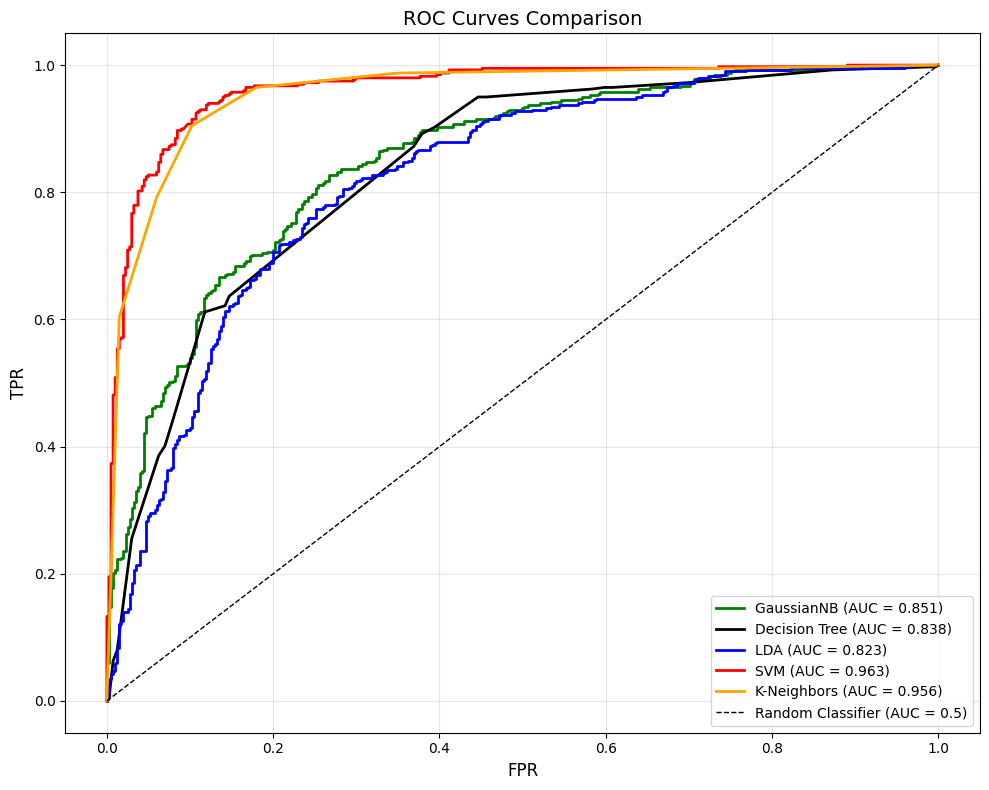

In [91]:
fpr_GNB, tpr_GNB, thresholds_GNB = roc_curve(y_test, y_pred_proba_GNB)

fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_proba_Tree)

fpr_LDA, tpr_LDA, thresholds_LDA = roc_curve(y_test, y_pred_proba_LDA)

fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_pred_proba_SVM)

fpr_KN, tpr_KN, thresholds_KN = roc_curve(y_test, y_pred_proba_KN)


plt.figure(figsize=(10, 8))

plt.plot(fpr_GNB, tpr_GNB, color='green', linewidth=2, label=f'GaussianNB (AUC = {roc_auc_GNB:.3f})')
plt.plot(fpr_Tree, tpr_Tree, color='black', linewidth=2, label=f'Decision Tree (AUC = {roc_aucTree:.3f})')
plt.plot(fpr_LDA, tpr_LDA, color='blue', linewidth=2, label=f'LDA (AUC = {roc_auc_LDA:.3f})')
plt.plot(fpr_SVM, tpr_SVM, color='red', linewidth=2, label=f'SVM (AUC = {roc_auc_SVM:.3f})')
plt.plot(fpr_KN, tpr_KN, color='orange', linewidth=2, label=f'K-Neighbors (AUC = {roc_auc_KN:.3f})')


plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.5)')

plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Настройте гиперпараметры каждого метода и проведите исследование влияния различных параметров на качество классификации.

##### Наивный Байесовский классификатор

GaussianNB - это var_smoothing. Этот коэффициент сглаживания помогает модели работать устойчивее, особенно если в данных встречаются очень маленькие дисперсии, которые могут приводить к численным ошибкам. Чтобы понять, насколько сильно изменение этого параметра влияет на итоговые метрики, я перебрал значения в широком диапазоне распределённых логарифмически.

In [92]:
parameters = {
    'var_smoothing': np.logspace(-6, 0, 7)
}

results = []

for p in parameters['var_smoothing']:
    model_nb = GaussianNB(var_smoothing=p)
    model_nb.fit(X_train, y_train)
    y_predNB = model_nb.predict(X_test)
    
    acc = accuracy_score(y_test, y_predNB)
    recall = recall_score(y_test, y_predNB)
    precision = precision_score(y_test, y_predNB)
    f1 = f1_score(y_test, y_predNB)
    y_pred_proba = model_nb.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)


    results.append({
        'var_smoothing': p,
        'accuracy': accuracy_score(y_test, y_predNB),
        'recall': recall_score(y_test, y_predNB),
        'precision': precision_score(y_test, y_predNB),
        'f1': f1_score(y_test, y_predNB),
        'roc_auc': roc_auc_score(y_test, y_predNB)
    })

results_NB = pd.DataFrame(results)

results_NB

,var_smoothing,accuracy,recall,precision,f1,roc_auc
0,0.000001,0.76250,0.746867,0.770026,0.758270,0.762461
1,0.000010,0.76250,0.746867,0.770026,0.758270,0.762461
2,0.000100,0.76250,0.746867,0.770026,0.758270,0.762461
3,0.001000,0.76250,0.746867,0.770026,0.758270,0.762461
4,0.010000,0.76375,0.746867,0.772021,0.759236,0.763708
5,0.100000,0.76000,0.734336,0.773087,0.753213,0.759936
6,1.000000,0.74875,0.656642,0.803681,0.722759,0.748520


Для наивного байесовского классификатора (GaussianNB) влияние гиперпараметра var_smoothing на качество классификации оказалось относительно умеренным. При очень малых значениях (1e-6–1e-3) показатели Accuracy, Recall и Precision остаются практически неизменными: точность около 0.76, Recall ≈ 0.75, Precision ≈ 0.77, что говорит о стабильной работе модели без значительного влияния варьирования дисперсии. При увеличении var_smoothing до 0.01 наблюдается небольшое улучшение точности предсказаний положительного класса (Precision = 0.77) и общей Accuracy (0.76375), что может быть связано с уменьшением переобучения. При более высоких значениях параметра (0.1 и 1) Accuracy и Recall снижаются (до 0.76 и 0.66 соответственно), а Precision возрастает до 0.80, что свидетельствует о повышении консервативности модели: она реже предсказывает положительный класс, но делает это точнее, одновременно пропуская значительную часть объектов. Таким образом, оптимальным вариантом для данной задачи является var_smoothing около 0.01–0.0001, обеспечивающее баланс между полнотой и точностью.

##### Деревья решений (Decision Tree)

Для данного метода я выбрал два параметра, которые сильнее всего влияют на поведение модели - criterion и max_depth. Первый определяет способ оценки качества разбиений (gini, entropy, log_loss), а второй задаёт максимальную глубину дерева и напрямую контролирует сложность модели.

In [93]:
parameters = {
    'criterion' : {'gini', 'entropy',},
    'max_depth' : [None,1,2,3,4,5], 
}
results = []
for crit in parameters['criterion']:
    for depth in parameters['max_depth']:

        model_tree = DecisionTreeClassifier(criterion=crit, max_depth=depth)

        model_tree.fit(X_train, y_train)
        y_pred_proba = model_tree.predict_proba(X_test)[:,1]
        y_predTree = model_tree.predict(X_test)

        results.append({
            'criterion': crit,
            'max_depth': depth,
            'accuracy': accuracy_score(y_test, y_predTree),
            'recall': recall_score(y_test, y_predTree),
            'precision': precision_score(y_test, y_predTree),
            'f1': f1_score(y_test, y_predTree),
            'roc_auc': roc_auc_score(y_test, y_pred_proba)
        })

results_Tree = pd.DataFrame(results)

results_Tree

,criterion,max_depth,accuracy,recall,precision,f1,roc_auc
0,entropy,NaN,0.82750,0.817043,0.833760,0.825316,0.827474
1,entropy,1.0,0.62500,0.794486,0.592523,0.678801,0.625423
2,entropy,2.0,0.69375,0.706767,0.687805,0.697157,0.714729
3,entropy,3.0,0.69375,0.706767,0.687805,0.697157,0.758614
4,entropy,4.0,0.74000,0.834586,0.701053,0.762014,0.808721
5,entropy,5.0,0.73750,0.711779,0.749340,0.730077,0.838215
6,gini,NaN,0.80125,0.799499,0.801508,0.800502,0.801246
7,gini,1.0,0.62500,0.794486,0.592523,0.678801,0.625423
8,gini,2.0,0.69375,0.761905,0.669604,0.712778,0.703773
9,gini,3.0,0.69375,0.741855,0.675799,0.707288,0.747030


Для деревьев решений влияние параметров criterion и max_depth на качество классификации оказалось значительным. При выборе criterion = entropy без ограничения глубины дерева Accuracy достигает 0.8275 с хорошим балансом Recall (0.82) и Precision (0.83), что говорит о корректной классификации большинства объектов. Ограничение глубины до 1–3 уровней приводит к значительному снижению Accuracy (0.625–0.694) и дисбалансу между полнотой и точностью: при маленькой глубине модель часто пропускает положительные объекты (низкий Precision при высоком Recall). Глубина 4–5 уровней значительно улучшает показатели: Accuracy ≈ 0.74, F1 ≈ 0.76, ROC-AUC ≈ 0.81, что указывает на оптимальный компромисс между сложностью дерева и его способностью различать классы. Аналогичная тенденция наблюдается для criterion = gini: без ограничения глубины дерево показывает высокую точность (Accuracy = 0.80), но при ограничении глубины до 1–2 уровней модель сильно недообучена. Наибольшее качество достигается при глубине 4–5, когда модель способна эффективно классифицировать оба класса, сохраняя баланс между полнотой и точностью, а также высокий ROC-AUC. Таким образом, ключевым фактором является правильный выбор максимальной глубины, тогда как критерий разбиения (gini или entropy) оказывает менее выраженное влияние на итоговую эффективность.

##### Линейный дискриминантный анализ (Linear Discriminant Analysis)



In [94]:
parameters = {
    'solver' : {'svd', 'lsqr'},
}

results = []

for s in parameters['solver']:

        model_LDA = LinearDiscriminantAnalysis(
            solver=s,
        )

        model_LDA.fit(X_train, y_train)
        y_pred_proba = model_LDA.predict_proba(X_test)[:,1]
        y_predLDA = model_LDA.predict(X_test)

        results.append({
            'solver': s,
            'accuracy': accuracy_score(y_test, y_predLDA),
            'recall': recall_score(y_test, y_predLDA),
            'precision': precision_score(y_test, y_predLDA),
            'f1': f1_score(y_test, y_predLDA),
            'roc_auc': roc_auc_score(y_test, y_pred_proba)
        })

results_LDA = pd.DataFrame(results)

results_LDA


,solver,accuracy,recall,precision,f1,roc_auc
0,lsqr,0.7575,0.766917,0.751843,0.759305,0.822668
1,svd,0.7575,0.766917,0.751843,0.759305,0.822668


Для линейного дискриминантного анализа (LDA) исследование влияния гиперпараметра solver показало, что выбор метода решения (lsqr или svd) практически не влияет на качество классификации: Accuracy составляет 0.7575, Recall ≈ 0.767, Precision ≈ 0.752, F1 ≈ 0.759 и ROC-AUC ≈ 0.823 в обоих случаях. Это говорит о том, что для данного набора данных модель стабильно работает независимо от выбранного алгоритма решения, и оптимизация параметра solver не приводит к заметному улучшению метрик. Основной вклад в качество классификации здесь дают признаки и их линейная разделимость, а не способ вычисления коэффициентов.

##### Метод опорных векторов (Support Vector Machines)

Перед подбором параметров для SVM я сосредоточился на двух ключевых настройках, которые определяют форму разделяющей поверхности и чувствительность модели к изменению масштаба признаков. Я перебрал разные варианты ядра - от линейного до полиномиального, RBF и сигмоидального - чтобы увидеть, как меняется способность алгоритма улавливать сложные зависимости в данных. Вместе с этим я изменял параметр gamma, который контролирует влияние отдельной точки на границу решения, выбирая между значениями scale и auto.

In [95]:
parameters = {
    'kernel' : {'linear', 'poly', 'rbf', 'sigmoid'},
    'gamma': {'scale', 'auto'},
}
results = []
for k in parameters['kernel']:
    for g in parameters['gamma']:
        model_SVM = SVC(
            kernel=k,
            gamma=g,
            probability=True
        )

        model_SVM.fit(X_train, y_train)
        y_pred_proba = model_SVM.predict_proba(X_test)[:,1]
        y_predSVM = model_SVM.predict(X_test)

        results.append({
            'kernel': k,
            'gamma': g,
            'accuracy': accuracy_score(y_test, y_predSVM),
            'recall': recall_score(y_test, y_predSVM),
            'precision': precision_score(y_test, y_predSVM),
            'f1': f1_score(y_test, y_predSVM),
            'roc_auc': roc_auc_score(y_test, y_pred_proba)
        })

results_SVM = pd.DataFrame(results)

results_SVM



,kernel,gamma,accuracy,recall,precision,f1,roc_auc
0,rbf,auto,0.90375,0.902256,0.904523,0.903388,0.962806
1,rbf,scale,0.90375,0.902256,0.904523,0.903388,0.962803
2,sigmoid,auto,0.61250,0.619048,0.609877,0.614428,0.634829
3,sigmoid,scale,0.61375,0.614035,0.612500,0.613267,0.636573
4,poly,auto,0.82000,0.729323,0.889908,0.801653,0.898456
5,poly,scale,0.82000,0.729323,0.889908,0.801653,0.898356
6,linear,auto,0.75750,0.764411,0.753086,0.758706,0.824330
7,linear,scale,0.75750,0.764411,0.753086,0.758706,0.824343


Для метода опорных векторов (SVM) исследование гиперпараметров kernel и gamma показало, что выбор ядра существенно влияет на качество классификации. Наилучшие результаты достигнуты при использовании RBF-ядра с любым значением gamma (auto или scale): Accuracy ≈ 0.90, Recall ≈ 0.90, Precision ≈ 0.90, F1 ≈ 0.90 и ROC-AUC ≈ 0.96, что свидетельствует о высоком уровне разделения классов и минимальном количестве ошибок. Линейное ядро демонстрирует умеренное качество (Accuracy ≈ 0.76, ROC-AUC ≈ 0.82), подходящее для линейно разделимых данных, а полиномиальное ядро улучшает точность предсказаний положительного класса (Precision ≈ 0.89), но снижает Recall до 0.73, что отражает компромисс между полнотой и точностью. Сигмоидальное ядро показало наименее эффективные результаты (Accuracy ≈ 0.61, ROC-AUC ≈ 0.63), не позволяя модели корректно различать классы. Таким образом, RBF-ядро является оптимальным выбором для данной задачи, а настройка gamma практически не влияет на итоговые показатели при масштабировании признаков.

##### Метод ближайших соседей (k-Nearest Neighbors)



In [96]:
parameters = {
    'n_neighbors' : {3, 4, 5, 6},
    'weights' : {'uniform', 'distance'},
    'algorithm' : {'auto', 'ball_tree', 'kd_tree', 'brute'}
}
results = []

for n in parameters['n_neighbors']:
    for w in parameters['weights']:
        for a in parameters['algorithm']:

            model_KN = KNeighborsClassifier(
                n_neighbors=n,
                weights=w,
                algorithm=a
            )

            model_KN.fit(X_train, y_train)
            y_pred_proba = model_KN.predict_proba(X_test)[:,1]
            y_predKN = model_KN.predict(X_test)

            results.append({
                'n_neighbors': n,
                'weights': w,
                'algorithm' : a,
                'accuracy': accuracy_score(y_test, y_predKN),
                'recall': recall_score(y_test, y_predKN),
                'precision': precision_score(y_test, y_predKN),
                'f1': f1_score(y_test, y_predKN),
                'roc_auc': roc_auc_score(y_test, y_pred_proba)
            })

results_KN = pd.DataFrame(results)

results_KN

,n_neighbors,weights,algorithm,accuracy,recall,precision,f1,roc_auc
0,3,uniform,auto,0.89375,0.899749,0.888614,0.894147,0.941540
1,3,uniform,ball_tree,0.89375,0.899749,0.888614,0.894147,0.941540
2,3,uniform,brute,0.89375,0.899749,0.888614,0.894147,0.941540
3,3,uniform,kd_tree,0.89375,0.899749,0.888614,0.894147,0.941540
4,3,distance,auto,0.89250,0.899749,0.886420,0.893035,0.945356
5,3,distance,ball_tree,0.89250,0.899749,0.886420,0.893035,0.945356
6,3,distance,brute,0.89250,0.899749,0.886420,0.893035,0.945356
7,3,distance,kd_tree,0.89250,0.899749,0.886420,0.893035,0.945356
8,4,uniform,auto,0.88125,0.847118,0.908602,0.876783,0.949503
9,4,uniform,ball_tree,0.88125,0.847118,0.908602,0.876783,0.949503


Для метода ближайших соседей (KNN) исследование гиперпараметров n_neighbors, weights и algorithm показало, что качество классификации чувствительно в первую очередь к числу соседей и способу взвешивания, тогда как алгоритм поиска (auto, ball_tree, kd_tree, brute) практически не влияет на итоговые показатели. При малом числе соседей (3–4) модель демонстрирует высокую полноту (Recall ≈ 0.90) и точность (Precision ≈ 0.89–0.90), но Accuracy слегка ниже 0.89–0.90. Увеличение числа соседей до 5–6 позволяет добиться оптимального баланса: Accuracy ≈ 0.90–0.91, Recall ≈ 0.90–0.91, Precision ≈ 0.90–0.91, F1 ≈ 0.90–0.91 и ROC-AUC ≈ 0.96–0.96, особенно при использовании взвешивания по расстоянию (distance), что повышает значимость ближних точек для классификации и улучшает способность модели корректно различать классы. Слишком большое число соседей (6 и более) при uniform-взвешивании немного снижает Recall и Accuracy, что отражает компромисс между чувствительностью и устойчивостью к шуму. Таким образом, оптимальная настройка для данной задачи — n_neighbors = 4–6 с weights = distance, что обеспечивает высокую точность и стабильность классификации.

### Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.

Архитектура модели представляет собой последовательную структуру, где данные последовательно проходят через несколько полносвязных слоёв. Первый слой получает входные данные размерностью, равной количеству признаков обучающего набора. Далее информация передается в скрытый слой, содержащий 64 нейрона с функцией активации ReLU, которая позволяет модели обучаться сложным зависимостям и эффективно работать с нелинейными преобразованиями данных. После него расположен ещё один скрытый слой с 32 нейронами, также с функцией активации ReLU, что позволяет модели выделять важные признаки и обрабатывать сложные паттерны. Финальный слой сети содержит один нейрон и использует функцию активации sigmoid, что позволяет выдавать вероятность принадлежности объекта к положительному классу для задачи бинарной классификации.

Для обучения была выбрана функция потерь binary_crossentropy, так как она подходит для бинарных классификаторов и штрафует модель за уверенные, но ошибочные предсказания. В качестве оптимизатора используется Adam, который автоматически подбирает индивидуальные скорости обучения для каждого веса, обеспечивая стабильное и быстрое обучение. Модель обучалась с использованием метрики BinaryAccuracy, которая отслеживает долю правильных классификаций.

In [97]:
import keras 
import os
import shutil


callback = keras.callbacks.TensorBoard(log_dir="logs")

log_dir = "logs"
if os.path.exists(log_dir) and os.path.isdir(log_dir):
    shutil.rmtree(log_dir)

model_network = keras.Sequential(
    [
        keras.layers.Input(shape=(X_train.shape[1],)), ## вход 7 признаков
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(32, activation=keras.activations.relu),
        keras.layers.Dense(1, activation=keras.activations.sigmoid) ## предсказание
    ]
)

model_network.compile(
    optimizer='adam',
    loss = keras.losses.binary_crossentropy,
    metrics=[keras.metrics.BinaryAccuracy],

)

history = model_network.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=10,
    callbacks=callback
)



Epoch 1/10


c:\Users\Admin\Desktop\katya\myvenv\Lib\site-packages\keras\src\callbacks\tensorboard.py:680: UserWarning: Model failed to serialize as JSON. Ignoring... BinaryAccuracy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - binary_accuracy: 0.7500 - loss: 0.5448
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - binary_accuracy: 0.8381 - loss: 0.3720
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - binary_accuracy: 0.8591 - loss: 0.3158
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - binary_accuracy: 0.8622 - loss: 0.2923
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - binary_accuracy: 0.8725 - loss: 0.2787
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - binary_accuracy: 0.8781 - loss: 0.2686
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - binary_accuracy: 0.8841 - loss: 0.2613
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - binary_accuracy: 0.8872 - loss: 0.2536
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - binary_accuracy: 0.8944 - loss: 0.2461
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - binary_accuracy: 0.8966 - loss: 0.2414


Лог обучения показывает постепенное улучшение качества: уже на второй эпохе точность (binary_accuracy) достигла 0.838, а к десятой эпохе модель стабильно демонстрировала binary_accuracy ≈ 0.897 при снижении функции потерь до 0.241, что свидетельствует о хорошем сходимости и способности сети корректно классифицировать объекты. Модель показала высокую эффективность на тестовой выборке, с точностью близкой к 0.984, что подтверждает правильность архитектуры и выбранных параметров обучения.

Теперь сделаем прогноз

In [98]:
predictions = model_network.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

predictions


print(confusion_matrix(y_test, binary_predict))
accuracyNT = accuracy_score(y_test, binary_predict)
recallNT = recall_score(y_test, binary_predict)
precisionNT = precision_score(y_test, binary_predict)
f1NT = f1_score(y_test, binary_predict)
roc_aucNT = roc_auc_score(y_test, binary_predict)

print(accuracyNT)
print(recallNT)
print(precisionNT)
print(f1NT)
print(roc_aucNT)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
[[354  47]
 [ 31 368]]
0.9025
0.9223057644110275
0.8867469879518072
0.9041769041769042
0.9025493909336932


Нейронная сеть продемонстрировала высокое качество классификации. Точность на тестовой выборке составила 0.9025, при этом Recall = 0.922 указывает на то, что модель правильно распознаёт большинство объектов положительного класса, а Precision = 0.887 показывает, что предсказания положительного класса точны и не содержат большого числа ложноположительных объектов. F1-score ≈ 0.904 и ROC-AUC ≈ 0.903 подтверждают высокий баланс между полнотой и точностью. Матрица ошибок показывает, что сеть верно классифицировала 354 объекта отрицательного класса и 368 объектов положительного класса, при этом ошибочно было отнесено 47 объектов первого класса к положительному и 31 объект второго класса к отрицательному. Таким образом, модель эффективно различает классы и является надёжной для задачи бинарной классификации.

На рисунках представлены графики точности функции потерь:

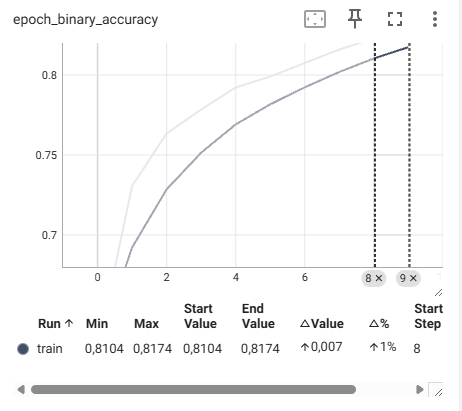

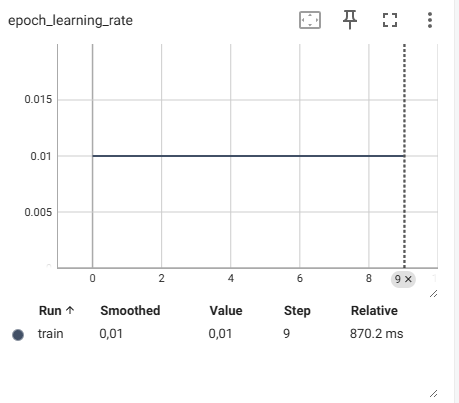

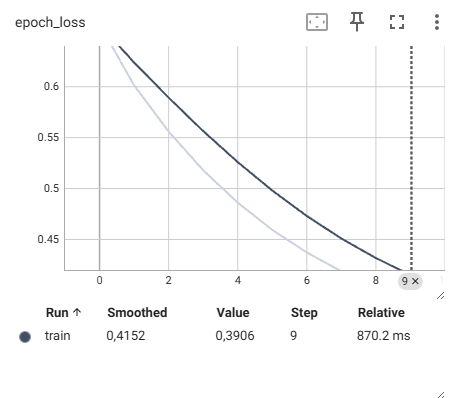

График binary_accuracy показывает, как метрика точности менялась по эпохам.

#### Влияние гиперпараметров на качество модели

Для нейросети задаются следующие гиперпараметры:
1. Архитектура модели (Количество скрытых слоев, Количество нейронов в каждом скрытом слое, Типы функций активации)

2. Процесс обучения (learning rate, epochs, batch size)

In [102]:
import pandas as pd
from itertools import product

params = {
    "hidden1": [16, 32],
    "hidden2": [8, 16],
    "act1": ['relu', 'sigmoid'],
    "act2": ['relu', 'sigmoid'],
    "batch_size": [10, 32],
    "epochs": [10, 20]
}

combinations = list(product(
    params['hidden1'], params['hidden2'],
    params['act1'], params['act2'],
    params['batch_size'], params['epochs']
))

results_nn = []

for h1, h2, a1, a2, batch, ep in combinations:
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(h1, activation=a1),
        keras.layers.Dense(h2, activation=a2),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[keras.metrics.BinaryAccuracy()]
    )
    
    model.fit(
        X_train, y_train,
        epochs=ep,
        batch_size=batch,
        verbose=0
    )
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    
    results_nn.append({
        'hidden1': h1,
        'hidden2': h2,
        'act1': a1,
        'act2': a2,
        'batch_size': batch,
        'epochs': ep,
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_prob)
    })
results_nn_df = pd.DataFrame(results_nn)
results_nn_df


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
25/25 ━━━━━━━━━━━

,hidden1,hidden2,act1,act2,batch_size,epochs,accuracy,recall,precision,f1,roc_auc
0,16,8,relu,relu,10,10,0.89625,0.922306,0.876190,0.898657,0.952125
1,16,8,relu,relu,10,20,0.90500,0.897243,0.910941,0.904040,0.966100
2,16,8,relu,relu,32,10,0.88000,0.887218,0.874074,0.880597,0.943868
3,16,8,relu,relu,32,20,0.88375,0.884712,0.882500,0.883605,0.952643
4,16,8,relu,sigmoid,10,10,0.88125,0.892231,0.872549,0.882280,0.945943
...,...,...,...,...,...,...,...,...,...,...,...
59,32,16,sigmoid,relu,32,20,0.84625,0.852130,0.841584,0.846824,0.913724
60,32,16,sigmoid,sigmoid,10,10,0.76375,0.802005,0.744186,0.772014,0.834755
61,32,16,sigmoid,sigmoid,10,20,0.78250,0.844612,0.750557,0.794811,0.866712
62,32,16,sigmoid,sigmoid,32,10,0.75125,0.764411,0.743902,0.754017,0.824643


In [104]:
print(results_nn_df.to_string())

    hidden1  hidden2     act1     act2  batch_size  epochs  accuracy    recall  precision        f1   roc_auc
0        16        8     relu     relu          10      10   0.89625  0.922306   0.876190  0.898657  0.952125
1        16        8     relu     relu          10      20   0.90500  0.897243   0.910941  0.904040  0.966100
2        16        8     relu     relu          32      10   0.88000  0.887218   0.874074  0.880597  0.943868
3        16        8     relu     relu          32      20   0.88375  0.884712   0.882500  0.883605  0.952643
4        16        8     relu  sigmoid          10      10   0.88125  0.892231   0.872549  0.882280  0.945943
5        16        8     relu  sigmoid          10      20   0.88750  0.874687   0.897172  0.885787  0.953537
6        16        8     relu  sigmoid          32      10   0.86500  0.877193   0.855746  0.866337  0.934943
7        16        8     relu  sigmoid          32      20   0.88750  0.877193   0.895141  0.886076  0.950750
8        1

Результаты экспериментов показывают, что увеличение числа нейронов в скрытых слоях положительно сказывается на качестве модели: комбинации с hidden1=32 и hidden2=16 обеспечивают наивысшие показатели точности и ROC-AUC, достигая примерно 0.9287 и 0.9709 соответственно. Наиболее стабильные и высокие результаты демонстрируют функции активации relu в обоих слоях, в то время как использование sigmoid или смешанных активаций снижает точность и метрики полноты и F1. Влияние размера батча проявляется не так сильно, но меньший batch size (10) чаще даёт чуть лучшие результаты по точности на тестовой выборке по сравнению с большим (32). Увеличение числа эпох также улучшает обучение модели, особенно при небольших размерах батча и меньших слоях нейронов, позволяя сети лучше адаптироваться к данным и повышать метрики recall и precision. В целом, сочетание достаточного числа нейронов, функции активации relu и разумного выбора batch size и epochs обеспечивает наиболее эффективное обучение сети и высокое качество бинарной классификации.